Importing Computer Vision Libraries

In [12]:
import cv2
import pytesseract

Function to convert scale extracted to meters 

In [51]:
def scale_in_meters(text):
    if(text=="1 km" or text=="1km" or text=="7km" or text=="7 km"):
        dis=1000
    elif(text=="2 km" or text=="2km"):
        dis=2000
    elif(text=="5 km" or text=="5km"):
        dis=5000
    elif(text=="500m" or text=="500 m"):
        dis=500
    elif(text=="200m" or text=="200 m"):
        dis=200
    elif(text=="100m" or text=="100 m"):
        dis=100
    elif(text=="50m" or text=="50 m"):
        dis=50
    elif(text=="20m" or text=="20 m"):
        dis=20
    elif(text=="10m" or text=="10 m"):
        dis=10
    return dis

Loading the image

In [53]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
image_path = r"C:\Users\arpan\OneDrive\Pictures\Screenshots\Screenshot 2024-06-03 094825.png" #Path of image to be analysed
image = cv2.imread(image_path)

Specifying Region of Interest (ROI) for extracting scale

In [54]:
height, width, _ = image.shape
x = width - 350  
y = height - 150  
w = 350  
h = 150 
# Crop the region containing the scale
roi = image[y:y+h, x:x+w]

Extracting Scale Text

In [55]:
extracted_text = pytesseract.image_to_string(roi)

import re

def extract_digit_with_following_chars(input_string):
    
    pattern = r'\d{1,3}.*?m'
    
    
    matches = re.findall(pattern, input_string)
    
    return matches


result = extract_digit_with_following_chars(extracted_text)
if len(result)==0:
    print("No scale")

print('Extracted Text:', result[-1])

Extracted Text: 500 m


Preprocessing image to extract scale length

In [56]:
# Convert to grayscale
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Detect edges
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


Finding the length of scale in bottom right corner

Calculating Scale in meters per pixel

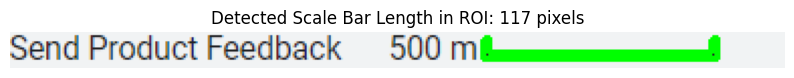

Scale in pixels: 117


In [57]:
#import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
#image_path = "path_to_your_image.jpg"
#image_cv = cv2.imread(image_path)

# Get the dimensions of the image
height, width, _ = image.shape

# Define the region of interest (bottom-right corner where the scale bar is located)
roi = image[int(0.98*height):height, int(0.8*width):width]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Apply a threshold to get a binary image
_, binary_roi = cv2.threshold(gray_roi, 50, 255, cv2.THRESH_BINARY_INV)

# Apply edge detection (Canny)
edges_roi = cv2.Canny(binary_roi, 50, 150)

# Find contours in the ROI
contours_roi, _ = cv2.findContours(edges_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to hold the longest contour (scale bar)
max_length = 0
scale_bar_contour = None

# Loop through contours to find the longest one that is also thick and black
for contour in contours_roi:
    # Calculate the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    # Calculate contour area
    area = cv2.contourArea(contour)
    # Check if the contour is a potential scale bar (long and thick)
    if w > max_length and h > 10 and area > 50:  # Adjust the h > 10 and area > 500 conditions if needed
        max_length = w
        scale_bar_contour = contour

# Draw the longest contour (scale bar) on the ROI
if scale_bar_contour is not None:
    cv2.drawContours(roi, [scale_bar_contour], -1, (0, 255, 0), 2)

# Display the ROI with the detected scale bar
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Scale Bar Length in ROI: {max_length} pixels")
plt.axis('off')
plt.show()

print("Scale in pixels:", max_length)


In [58]:
scale_bar_length_m = scale_in_meters(result[-1])
meters_per_pixel=scale_bar_length_m/max_length
print("meters_per_pixel:",meters_per_pixel)

meters_per_pixel: 4.273504273504273
